# **Classification Mountains vs Beaches**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Mengimpor dataset**

In [2]:
dataset = pd.read_csv('mountains_vs_beaches_preferences.csv')

In [3]:
dataset.head(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
5,25,male,110588,doctorate,3,sunbathing,2895,urban,6,47,fall,0,1,0
6,38,male,22245,bachelor,1,swimming,4994,rural,157,225,fall,0,1,0
7,56,non-binary,109411,bachelor,8,sunbathing,3656,urban,210,166,winter,1,0,0
8,36,male,22531,master,6,swimming,2408,suburban,218,263,summer,1,1,0
9,40,non-binary,90840,high school,1,swimming,4044,rural,271,15,summer,1,1,0


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5068 entries, 0 to 5067
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     5068 non-null   int64 
 1   Gender                  5068 non-null   object
 2   Income                  5068 non-null   int64 
 3   Education_Level         5068 non-null   object
 4   Travel_Frequency        5068 non-null   int64 
 5   Preferred_Activities    5068 non-null   object
 6   Vacation_Budget         5068 non-null   int64 
 7   Location                5068 non-null   object
 8   Proximity_to_Mountains  5068 non-null   int64 
 9   Proximity_to_Beaches    5068 non-null   int64 
 10  Favorite_Season         5068 non-null   object
 11  Pets                    5068 non-null   int64 
 12  Environmental_Concerns  5068 non-null   int64 
 13  Preference              5068 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 554.4+ KB
None


In [5]:
# periksa nilai yang hilang di setiap kolom
print(dataset.isnull().sum())

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = dataset.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

In [7]:
print("Tipe data setelah encoding:")
print(dataset.dtypes)

Tipe data setelah encoding:
Age                       int64
Gender                    int32
Income                    int64
Education_Level           int32
Travel_Frequency          int64
Preferred_Activities      int32
Vacation_Budget           int64
Location                  int32
Proximity_to_Mountains    int64
Proximity_to_Beaches      int64
Favorite_Season           int32
Pets                      int64
Environmental_Concerns    int64
Preference                int64
dtype: object


In [8]:
dataset.head(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,1,71477,0,9,1,2477,2,175,267,2,0,1,1
1,69,1,88740,3,1,3,4777,1,228,190,0,0,1,0
2,46,0,46562,3,0,1,1469,2,71,280,3,0,0,1
3,32,2,99044,2,6,0,1482,0,31,255,2,1,0,1
4,60,0,106583,2,5,2,516,1,23,151,3,1,1,0
5,25,1,110588,1,3,2,2895,2,6,47,0,0,1,0
6,38,1,22245,0,1,3,4994,0,157,225,0,0,1,0
7,56,2,109411,0,8,2,3656,2,210,166,3,1,0,0
8,36,1,22531,3,6,3,2408,1,218,263,2,1,1,0
9,40,2,90840,2,1,3,4044,0,271,15,2,1,1,0


In [9]:
# Memilih fitur dan label
X = dataset.iloc[:, [0, 6]].values  
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
print(X)

[[  56 2477]
 [  69 4777]
 [  46 1469]
 ...
 [  36 3675]
 [  53 1738]
 [  30 1258]]


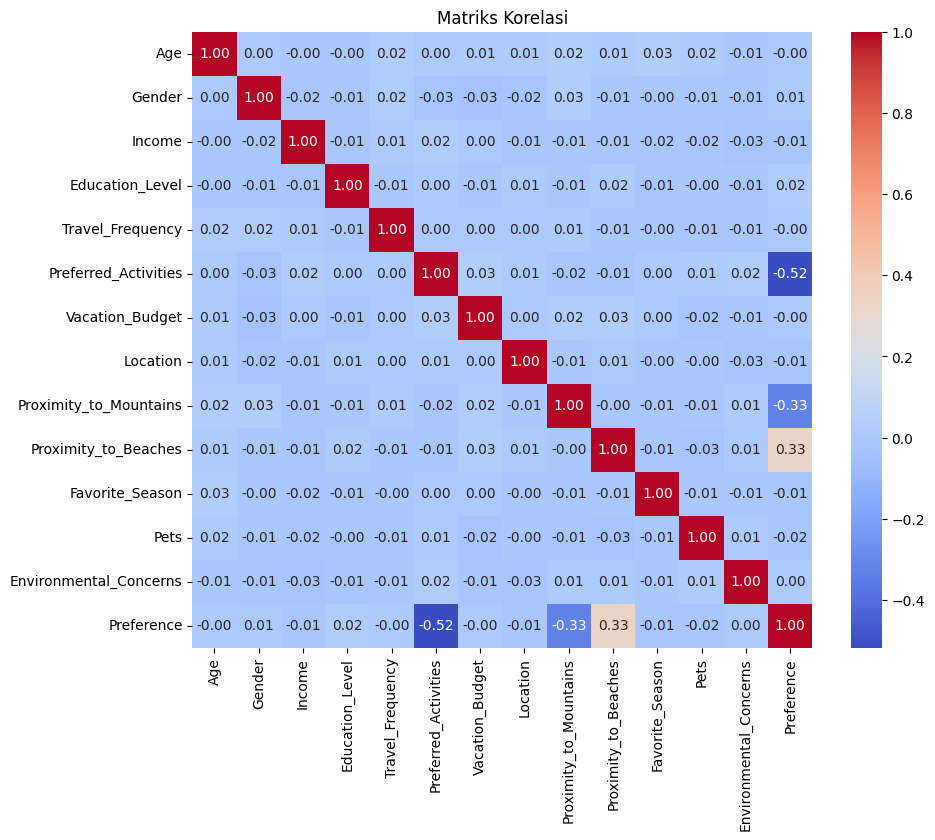

In [12]:
import seaborn as sns

numerical_data = dataset.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = dataset.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [13]:
# Membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# Memeriksa bentuk dan tipe data setelah pembagian
print("\nBentuk X_train:", X_train.shape)
print("Tipe data X_train:", X_train.dtype)


Bentuk X_train: (4054, 2)
Tipe data X_train: int64


In [15]:
# Menampilkan hasil pembagian
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (4054, 2)
Ukuran X_test: (1014, 2)
Ukuran y_train: (4054,)
Ukuran y_test: (1014,)


In [16]:
# Menampilkan nilai X_train dan y_train
print("\nFitur Pelatihan (X_train):")
print(X_train)
print("\nTarget Pelatihan (y_train):")
print(y_train)


Fitur Pelatihan (X_train):
[[  40 3463]
 [  66 2166]
 [  28 2603]
 ...
 [  51 4601]
 [  19  932]
 [  51 2385]]

Target Pelatihan (y_train):
[1 0 0 ... 1 0 0]


In [17]:
# Menampilkan nilai X_test dan y_test
print("\nFitur Pengujian (X_test):")
print(X_test)
print("\nTarget Pengujian (y_test):")
print(y_test)


Fitur Pengujian (X_test):
[[  33  788]
 [  26 4248]
 [  47 3264]
 ...
 [  49 2293]
 [  53 4117]
 [  21  512]]

Target Pengujian (y_test):
[0 0 1 ... 1 0 1]


In [18]:
# Standarisasi kolom numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
# Menghitung dan menampilkan confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)  
print("\nConfusion Matrix:")
print(cm)                                
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model Naive Bayes: {accuracy * 100:.2f}%')


Confusion Matrix:
[[755   0]
 [259   0]]
Akurasi Model Naive Bayes: 74.46%


C:\Users\62895\AppData\Local\Temp\ipykernel_13236\2712821513.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


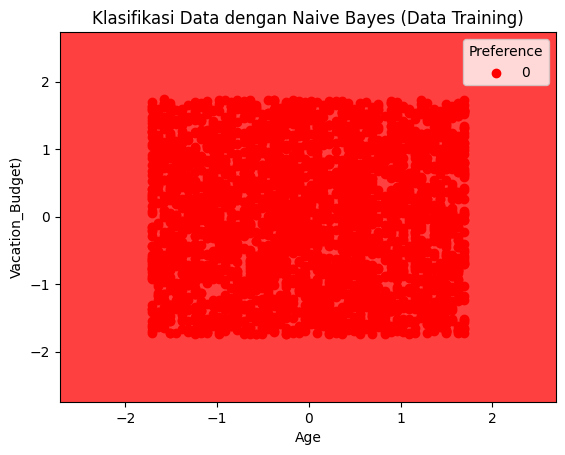

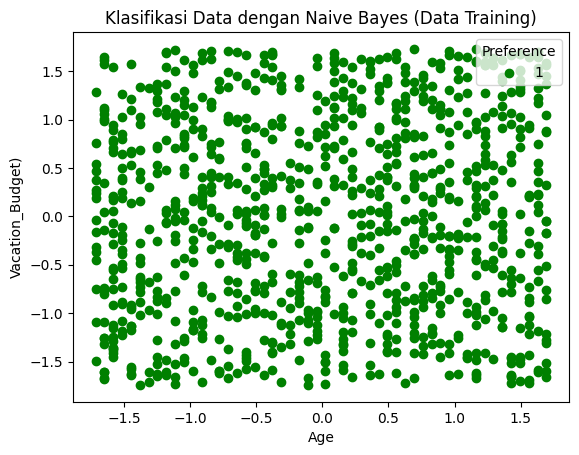

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('Age')
    plt.ylabel('Vacation_Budget)')
    plt.legend(title='Preference', loc='upper right')
    plt.show()

C:\Users\62895\AppData\Local\Temp\ipykernel_13236\193044644.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


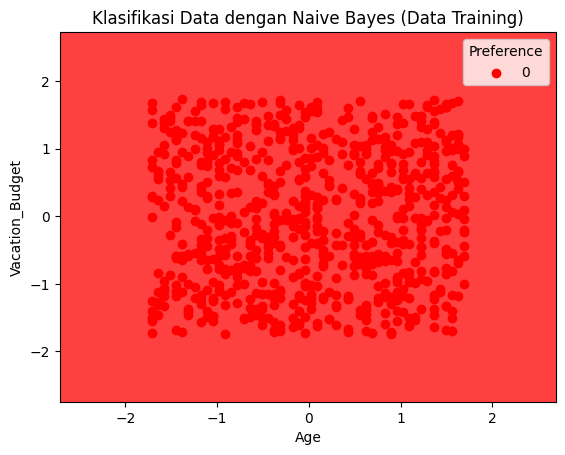

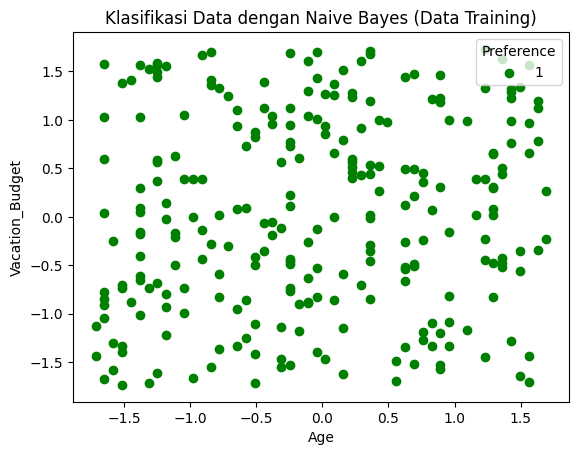

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('Age')
    plt.ylabel('Vacation_Budget')
    plt.legend(title='Preference', loc='upper right')
    plt.show()